In [20]:
import random
import matplotlib.pyplot as plt

S = 0
I = 1
R = 2

# TODOS: SCHEDULE
# Location indexed by time probably an array
# Indexed by time: Location ID: Int | None

# When sumulating you check location and time match

# Locations should be randomly generated and have ID's

# Major based sheduling?

# Should we model parties?

# THESE LATER
VACCINATED = 3
DEAD = 4

class Location:
    def __init__(self, infection_rate):
        self.infection_rate = infection_rate

class Person:
    def __init__(self, schedule, state=S):
        self.state = state
        self.recovery_prob = 0.1
        self.schedule = schedule

def pairs(lst):
    for i, item1 in enumerate(lst):
        for item2 in lst[i+1:]:
            yield item1, item2

def infection_pairs(people, time):
    for person1, person2 in pairs(people):
        if person1.schedule[time] == person2.schedule[time]:
            if person1.state == I and person2.state == S:
                yield person1, person2
            elif person2.state == I and person1.state == S:
                yield person2, person1
                
def find_new_infections(people, locations, time):
    new_infections = []
    for person1, person2 in infection_pairs(people, time):
        infection_location = locations[person1.schedule[time]]
        if random.random() < infection_location.infection_rate and person2 not in new_infections:
            new_infections.append(person2)
    return new_infections

def count_state(people, state):
    return sum(1 for person in people if person.state == state)

def gen_locations(n):
    out = []

    for i in range(n):
        # Do we want this to be uniformly sampled?
        infection_probability = random.uniform(1e-2, 3e-2)

        loc = Location(infection_probability)

        out.append(loc)

    return out

"""
n - Number of items the locations array
"""
def gen_schedule(n):
    out = [None for i in range(24)]

    # Time slice for bedtime [0:8]
    # Time slice for classes out[8:18] 
    packed_index = random.randrange(2, 11)
    
    samples = random.sample(range(n), k=packed_index)

    indices = random.sample(range(8,18), k=packed_index)

    for (idx, sample) in zip(indices, samples):
        out[idx] = sample

    # Potential high risk activity (parties and gatherings and homework?) out[18:]

    return out
    
        
# REFACTOR THIS
def simulate(people, locations, num_days):
    infected = [count_state(people, I)]
    recovered = [count_state(people, R)]
    susceptible = [count_state(people, S)]
    for day in range(num_days):
        # Infection
        for person in find_new_infections(people):
            person.state = I
        # Recovery
        for person in people:
            if person.state == I and random.random() < person.recovery_prob:
                person.state = R
        # Track number of infected people
        infected.append(count_state(people, I))
        recovered.append(count_state(people, R))
        susceptible.append(count_state(people, S))

    return infected, recovered, susceptible


Text(0.5, 0, 'Days')

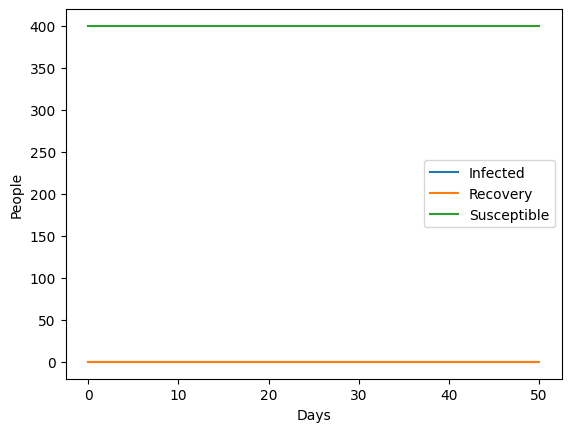

In [24]:
# locations = [Location(0.0135), Location(0.0134), Location(0.0132), Location(0.0136), Location(0.021)]
locations = gen_locations(500)

# people = [Person(locations[0], I), Person(locations[0])]

# In our initial model people got infected really fast but recovered really fast
ppl = []
for i in range(400):
    loc = i % 5
    status = random.choices([I, S], weights=[1,7])
    schedules = gen_schedule(500)
    person = Person(schedules, status[0])
    ppl.append(person)
    

num_days = 50
i, r, s = simulate(ppl, locations, num_days)

fig, ax = plt.subplots()
ax.plot(i)
ax.plot(r)
ax.plot(s)

ax.legend(["Infected", "Recovery", "Susceptible"])
ax.set_ylabel("People")
ax.set_xlabel("Days")

In [23]:
    print(gen_schedule(500)[8:18])

[338, 208, 128, None, None, None, None, 292, None, None]
